# Tutorial: Customer Review Classification

# Welcome!

User reviews have become the driving force behind e-commerce transactions. However, these reviews are often not as clear as they appear to be. Text mining can help us to detect sentiment in user reviews and classify the reviews based on their sentiment scores.

For this tutorial, we are using [RAPYD.AI](https://www.rapyd.ai) to access the text mining service.

To use RAPYD.AI, [sign up here for free](https://www.rapyd.ai/free-trial/). 

## Step 1: Cloning Repository

Let's clone a repository with some sample data and utility functions to keep this tutorial simple and focused.

In [113]:
!git clone https://github.com/rapyd-ai/use-cases.git

fatal: destination path 'use-cases' already exists and is not an empty directory.


In [0]:
import sys
sys.path.append('use-cases/classify-user-reviews/utils')
import rapyd_ai_utils as r

## Step 2: Load your dataset

For this prototype, we will need a dataset with some user reviews. The data has to come as a csv file without header, where each line is one text review that we want to classify.

If you don't have a text file at hand, or if you want to look at a sample, you can just call the utility function:

```
reviews_df = read_data()
```

To copy your file from a remote URL to this training machine, execute the following command:

```
wget -O "data/reviews.csv" "https://insert-your-url.here/"
```

To check if the import happend correctly, run: 

```
revies_df.head()
```

This should print the first couple of text reviews.



In [0]:
reviews_df = r.read_data("use-cases/classify-user-reviews/data/reviews.csv")

In [7]:
reviews_df.head()

,Review_Text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.


## Step 2: Inspect the data

To get some intuition about your dataset, we will plot some basic properties of the data. One critical factor is the text length. Basically, a good rule of thumb is anything between 50 to 100 characters on average. The longer each text phrase gets, the less practical is it ot squeeze the sentiment into one score.

You can view a distribution of your text lenght per line using the utility function:


```
plot_text_length(reviews_df['Review_Text'])
```



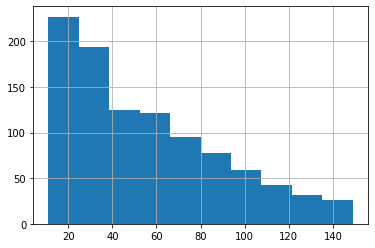

In [8]:
r.plot_text_length(reviews_df['Review_Text'])

## Step 3: Test Sentiment Scores for Reviews

Now that we checked our data, let's get some sentiment scores. We will try one sample at first, to get an idea of what we are getting from the AI as a Service.

Define your Account_ID and Token. To se your AcocuntID and generate an access token, login to https://my.rapyd.ai

```
account_id = 'your-account-id'
token = 'your-temporary-token'
```



In [0]:
account_id = ''
token = ''

In order to test the predictions, execute the following convenience function:

```
text = "I am getting coverage drops."
sentiment_score = get_sentiment_score(text, "AWS", "AUTO", account_id, token)
print(sentiment_score)
```



In [57]:
text = "I am getting coverage drops."
sentiment_score = r.get_sentiment_score(text, "AWS", "AUTO", account_id, token)
print(sentiment_score)

{'positive': 0.03, 'mixed': 0.0, 'neutral': 0.35, 'negative': 0.63}


As you see, the output will be an array with - in this case - 4 different levels (positive, neutral, mixed, negative). The output format will be different depending on the AI provider you are choosing. Try it out for yourself by replacing the provider parameter with either GCP, AZURE or AWS!

In [59]:
text = "I am getting coverage drops."
sentiment_score = r.get_sentiment_score(text, "AZURE", "AUTO", account_id, token)
print(sentiment_score)

{'positive': 0.02, 'neutral': 0.96, 'negative': 0.02}


## Step 4: Get Sentiment Scores for dataset

Lets use our newly gaines knowledge to generate sentiment scores for our dataset. 

However, it might be risky to send the total dataset at once to RAPYD.AI because this operation will be running against our free quota.

Therefore, let's sample our data to 50 rows and save quota. If you are confident and have enough quota left you can simply skip this step.

```
reviews_df = reviews_df.sample(50).reset_index(drop=True)

```

Now, we will actually enrich our dataset with the sentiment scores by calling the following utility function:

```
sentiment_df = add_sentiment_score_columns(reviews_df, "AWS", "AUTO", account_id, token)
```

If we look at our newly created object sentiment_df, you will see the new sentiment scores:

```
sentiment_df
```





In [0]:
reviews_df = reviews_df.sample(50).reset_index(drop=True)
sentiment_df = r.add_sentiment_score_columns(reviews_df, "AWS", "AUTO", account_id, token)

In [83]:
sentiment_df

,Review_Text,positive,mixed,neutral,negative
0,Great Hands Free Device.,1.00,0.0,0.00,0.00
1,Phone now holds charge like it did when it was...,1.00,0.0,0.00,0.00
2,AFter the first charge kept going dead after 1...,0.00,0.0,0.01,0.99
3,"Then I exchanged for the same phone, even that...",0.00,0.0,0.01,0.99
4,You never know if you pushed it hard enough or...,0.11,0.4,0.33,0.16
5,WORTHWHILE.,0.17,0.0,0.45,0.38
6,Does not fit.,0.00,0.0,0.00,1.00
7,"Comfortable, Nice Range, Good Battery Life.",1.00,0.0,0.00,0.00
8,The picture resolution is far below what other...,0.00,0.0,0.01,0.99
9,Does not charge the Cingular (ATT) 8525 phone.,0.00,0.0,0.04,0.96


## Step 5: Convert Sentiment Score to Star Rating

How do we turn our sentiment scores into a star rating?

The easiest approach is to define some static rules, that match a star rating to a certain condition. 

For our tutorial we defined the rules for converting AWS sentiment scores to a 5-star scale as follows:


*   5 Stars if positive sentiment == 1.00
*   4 Stars if positive sentiment >= 0.65
*   1 Star if negative sentiment >= 0.95
*   2 Stars if negative sentiment >= 0.85
*   3 Stars for everythin else

To apply this rule set, just call the following function to your dataset and save the output as a new column:

```
sentiment_df['Stars'] = aws_sentiment_to_stars(sentiment_df)
```

In [0]:
sentiment_df['Stars'] = r.aws_sentiment_to_stars(sentiment_df)

In [104]:
sentiment_df

,Review_Text,positive,mixed,neutral,negative,Stars
0,Great Hands Free Device.,1.00,0.0,0.00,0.00,5
1,Phone now holds charge like it did when it was...,1.00,0.0,0.00,0.00,5
2,AFter the first charge kept going dead after 1...,0.00,0.0,0.01,0.99,1
3,"Then I exchanged for the same phone, even that...",0.00,0.0,0.01,0.99,1
4,You never know if you pushed it hard enough or...,0.11,0.4,0.33,0.16,3
5,WORTHWHILE.,0.17,0.0,0.45,0.38,3
6,Does not fit.,0.00,0.0,0.00,1.00,1
7,"Comfortable, Nice Range, Good Battery Life.",1.00,0.0,0.00,0.00,5
8,The picture resolution is far below what other...,0.00,0.0,0.01,0.99,1
9,Does not charge the Cingular (ATT) 8525 phone.,0.00,0.0,0.04,0.96,1


## Step 6: Inspect Star Ratings

Lets find out how well our conversion perfomed by looking at the distribution of our Star rating. The sample dataset had a balance of good and bad reviews, so we should see a similar amount of 1 star reviews and 5 star reviews with something going on in between.

To see a distribution of our star ratings, we simply call

```
sentiment_df.Stars.hist()
```



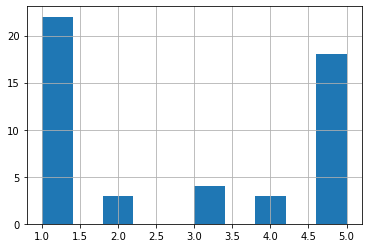

In [107]:
sentiment_df.Stars.hist()

Looks like a nice distribution! Another good feedback is given by looking at the star rating individually. For example, let's look at some 5 Star ratings:

```
sentiment_df.query("Stars == 5")
```

Or have a look at some mediocre reviews:


```
sentiment_df.query("Stars == 2 | Stars == 3")
```





In [108]:
sentiment_df.query("Stars == 5")

,Review_Text,positive,mixed,neutral,negative,Stars
0,Great Hands Free Device.,1.0,0.0,0.0,0.0,5
1,Phone now holds charge like it did when it was...,1.0,0.0,0.0,0.0,5
7,"Comfortable, Nice Range, Good Battery Life.",1.0,0.0,0.0,0.0,5
13,"Excellent product, I am very satisfied with th...",1.0,0.0,0.0,0.0,5
15,I've dropped my phone more times than I can sa...,1.0,0.0,0.0,0.0,5
21,"every thing on phone work perfectly, she like it.",1.0,0.0,0.0,0.0,5
23,Nice Sound.,1.0,0.0,0.0,0.0,5
24,So far it has worked like a charm.,1.0,0.0,0.0,0.0,5
25,Battery life is also great!,1.0,0.0,0.0,0.0,5
29,The keyboard is a nice compromise between a fu...,1.0,0.0,0.0,0.0,5


In [109]:
sentiment_df.query("Stars == 2 | Stars == 3")

,Review_Text,positive,mixed,neutral,negative,Stars
4,You never know if you pushed it hard enough or...,0.11,0.4,0.33,0.16,3
5,WORTHWHILE.,0.17,0.0,0.45,0.38,3
33,I could not recommend these more.,0.16,0.0,0.00,0.84,3
36,Their Research and Development division obviou...,0.59,0.0,0.37,0.04,3
41,People couldnt hear me talk and I had to pull ...,0.01,0.0,0.05,0.94,2
44,Were JERKS on the phone.,0.02,0.0,0.07,0.92,2
45,Couldn't figure it out,0.03,0.0,0.07,0.90,2


Looking at your classified data will give you a good idea if your decision rules for the star ratings actually match the data, or if you need a bit more tweaking.

# Conclusion

We hope that you found this tutorial useful. We have used Amazon Comprehend as a backend which you could use to bring your prototype into production. You can find more information about Amazon Comprehend Sentiment Analysis services here:

https://docs.aws.amazon.com/comprehend/latest/dg/get-started-api-sentiment.html 